In [ ]:
import pandas as pd
import numpy as np

# Path to your extracted CSV
csv_path = "risk_factors_cervical_cancer.csv"

df = pd.read_csv(csv_path)
print(df.shape)
df.head()


(858, 36)


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [ ]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(r"[^a-z0-9]+", "_", regex=True)
      .str.strip("_")
)
df.columns.tolist()


['age',
 'number_of_sexual_partners',
 'first_sexual_intercourse',
 'num_of_pregnancies',
 'smokes',
 'smokes_years',
 'smokes_packs_year',
 'hormonal_contraceptives',
 'hormonal_contraceptives_years',
 'iud',
 'iud_years',
 'stds',
 'stds_number',
 'stds_condylomatosis',
 'stds_cervical_condylomatosis',
 'stds_vaginal_condylomatosis',
 'stds_vulvo_perineal_condylomatosis',
 'stds_syphilis',
 'stds_pelvic_inflammatory_disease',
 'stds_genital_herpes',
 'stds_molluscum_contagiosum',
 'stds_aids',
 'stds_hiv',
 'stds_hepatitis_b',
 'stds_hpv',
 'stds_number_of_diagnosis',
 'stds_time_since_first_diagnosis',
 'stds_time_since_last_diagnosis',
 'dx_cancer',
 'dx_cin',
 'dx_hpv',
 'dx',
 'hinselmann',
 'schiller',
 'citology',
 'biopsy']

In [ ]:
# Replace "?" placeholders with NaN and strip any stray whitespace
df = df.replace("?", np.nan)

# Convert all columns to numeric where possible
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Quick check
missing_per_col = df.isna().sum().sort_values(ascending=False)
missing_per_col.head(10)


,0
stds_time_since_first_diagnosis,787
stds_time_since_last_diagnosis,787
iud,117
iud_years,117
hormonal_contraceptives,108
hormonal_contraceptives_years,108
stds_hpv,105
stds_aids,105
stds_hepatitis_b,105
stds_hiv,105


In [ ]:
# Drop columns with >70% missing
thresh = 0.30  # keep columns with at least 30% non-missing data
keep_cols = df.columns[df.notna().mean() >= thresh]
df = df[keep_cols].copy()

# Drop fully empty rows and duplicates
df = df.dropna(how="all").drop_duplicates().reset_index(drop=True)

df.shape, df.isna().sum().sum()


((835, 34), np.int64(1957))

In [ ]:
# Median imputation for numeric columns
num_cols = df.columns  # all should be numeric now
medians = df[num_cols].median()
df[num_cols] = df[num_cols].fillna(medians)

# Sanity check
df.isna().sum().sum()


np.int64(0)

In [ ]:
# --- Check number of duplicate rows ---
num_duplicates = df.duplicated().sum()
print(f" Number of duplicate rows: {num_duplicates}")

# --- Remove duplicate rows ---
df = df.drop_duplicates().reset_index(drop=True)

# --- Identify binary columns (only 0 and 1 values) ---
def is_binary_series(s: pd.Series) -> bool:
    vals = set(pd.unique(s.dropna()))
    return vals.issubset({0, 1})

binary_cols = [c for c in df.columns if is_binary_series(df[c])]
cont_cols   = [c for c in df.columns if c not in binary_cols]

# --- Convert binary columns to int type ---
df[binary_cols] = df[binary_cols].astype(int)

print(f" Duplicates removed. Final shape: {df.shape}")
print(f"Binary columns: {len(binary_cols)} | Continuous columns: {len(cont_cols)}")


 Number of duplicate rows: 0
 Duplicates removed. Final shape: (830, 34)
Binary columns: 24 | Continuous columns: 10


In [ ]:
# Dataset overview
print("Dataset shape:", df.shape)
print("\nColumn names:\n", df.columns.tolist())

# Info and quick stats
print("\nData types and non-null counts:")
df.info()

print("\nDescriptive statistics:")
df.describe().T


Dataset shape: (830, 34)

Column names:
 ['age', 'number_of_sexual_partners', 'first_sexual_intercourse', 'num_of_pregnancies', 'smokes', 'smokes_years', 'smokes_packs_year', 'hormonal_contraceptives', 'hormonal_contraceptives_years', 'iud', 'iud_years', 'stds', 'stds_number', 'stds_condylomatosis', 'stds_cervical_condylomatosis', 'stds_vaginal_condylomatosis', 'stds_vulvo_perineal_condylomatosis', 'stds_syphilis', 'stds_pelvic_inflammatory_disease', 'stds_genital_herpes', 'stds_molluscum_contagiosum', 'stds_aids', 'stds_hiv', 'stds_hepatitis_b', 'stds_hpv', 'stds_number_of_diagnosis', 'dx_cancer', 'dx_cin', 'dx_hpv', 'dx', 'hinselmann', 'schiller', 'citology', 'biopsy']

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   age                                 830 non-nul

,count,mean,std,min,25%,50%,75%,max
age,830.0,27.069880,8.485135,13.0,21.0,26.0,32.0,84.0
number_of_sexual_partners,830.0,2.539759,1.657744,1.0,2.0,2.0,3.0,28.0
first_sexual_intercourse,830.0,17.025301,2.809700,10.0,15.0,17.0,18.0,32.0
num_of_pregnancies,830.0,2.287952,1.410874,0.0,1.0,2.0,3.0,11.0
smokes,830.0,0.148193,0.355505,0.0,0.0,0.0,0.0,1.0
smokes_years,830.0,1.241765,4.122522,0.0,0.0,0.0,0.0,37.0
smokes_packs_year,830.0,0.461333,2.245822,0.0,0.0,0.0,0.0,37.0
hormonal_contraceptives,830.0,0.693976,0.461118,0.0,0.0,1.0,1.0,1.0
hormonal_contraceptives_years,830.0,2.090644,3.609802,0.0,0.0,0.5,3.0,30.0
iud,830.0,0.100000,0.300181,0.0,0.0,0.0,0.0,1.0


Target distribution:
 biopsy
0    776
1     54
Name: count, dtype: int64

Positive rate: 6.51%


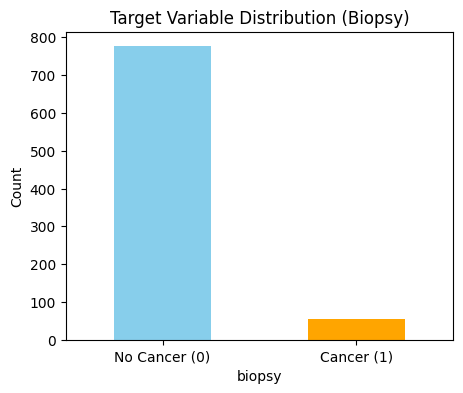

In [ ]:
# Target distribution
target_col = 'biopsy'
target_counts = df[target_col].value_counts()

print("Target distribution:\n", target_counts)
print(f"\nPositive rate: {target_counts[1] / target_counts.sum():.2%}")

# Plot
plt.figure(figsize=(5, 4))
target_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Target Variable Distribution (Biopsy)")
plt.xticks([0, 1], ['No Cancer (0)', 'Cancer (1)'], rotation=0)
plt.ylabel("Count")
plt.show()


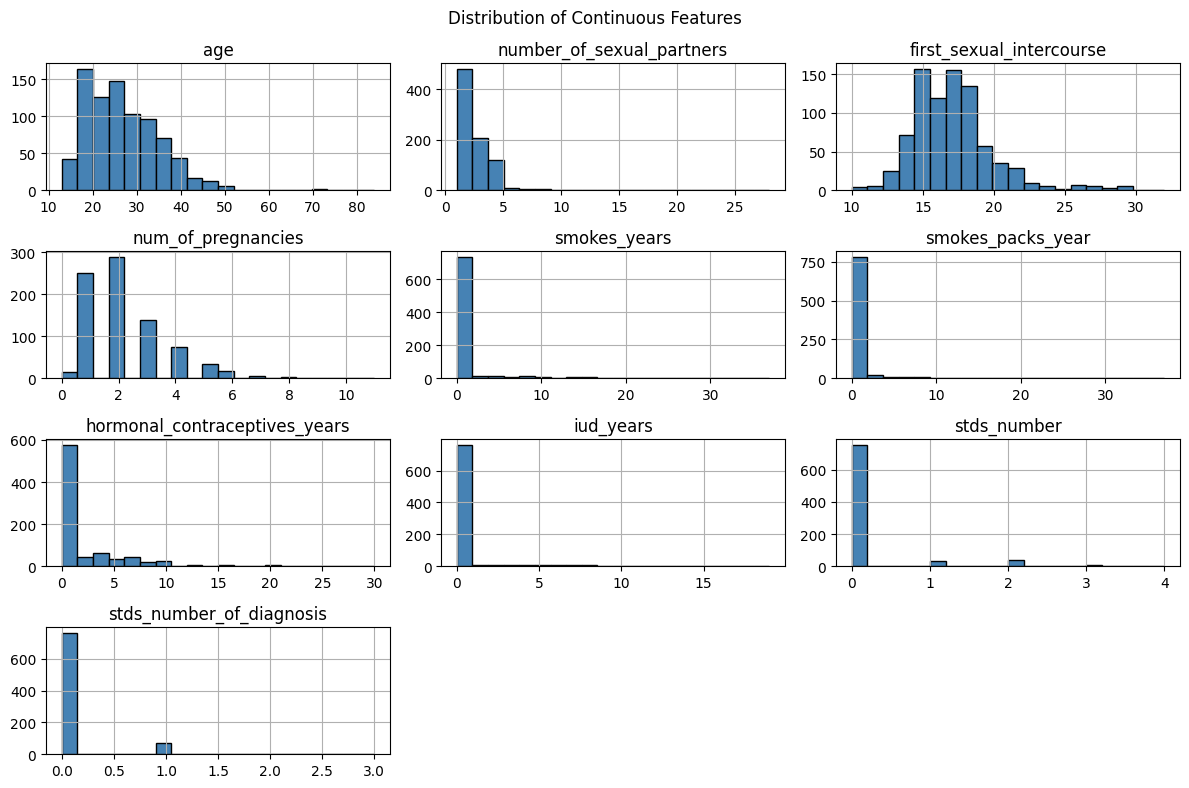

In [ ]:
# Histograms for continuous features
import numpy as np

cont_cols_subset = df[cont_cols].sample(
    min(len(cont_cols), 6), random_state=42
)  # show up to 6 continuous features

df[cont_cols_subset.columns].hist(figsize=(12, 8), bins=20, color='steelblue', edgecolor='black')
plt.suptitle("Distribution of Continuous Features")
plt.tight_layout()
plt.show()


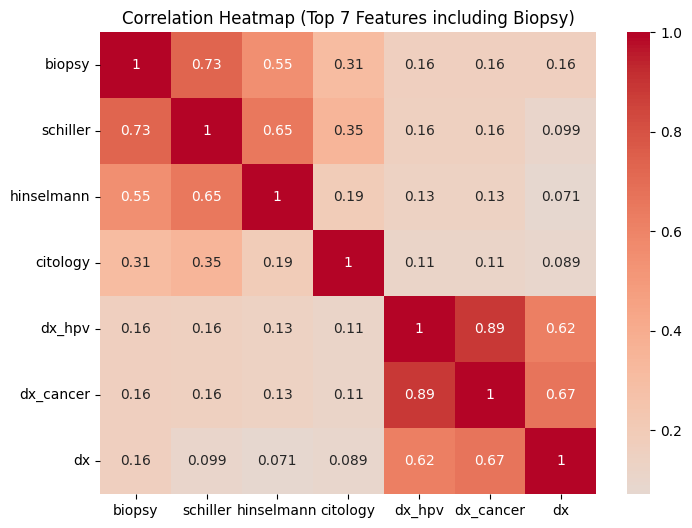

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Select top 6 correlated features with the target (excluding itself)
top_features = corr['biopsy'].abs().sort_values(ascending=False).head(7).index.tolist()

# Subset correlation matrix
corr_subset = corr.loc[top_features, top_features]

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap (Top 7 Features including Biopsy)")
plt.show()


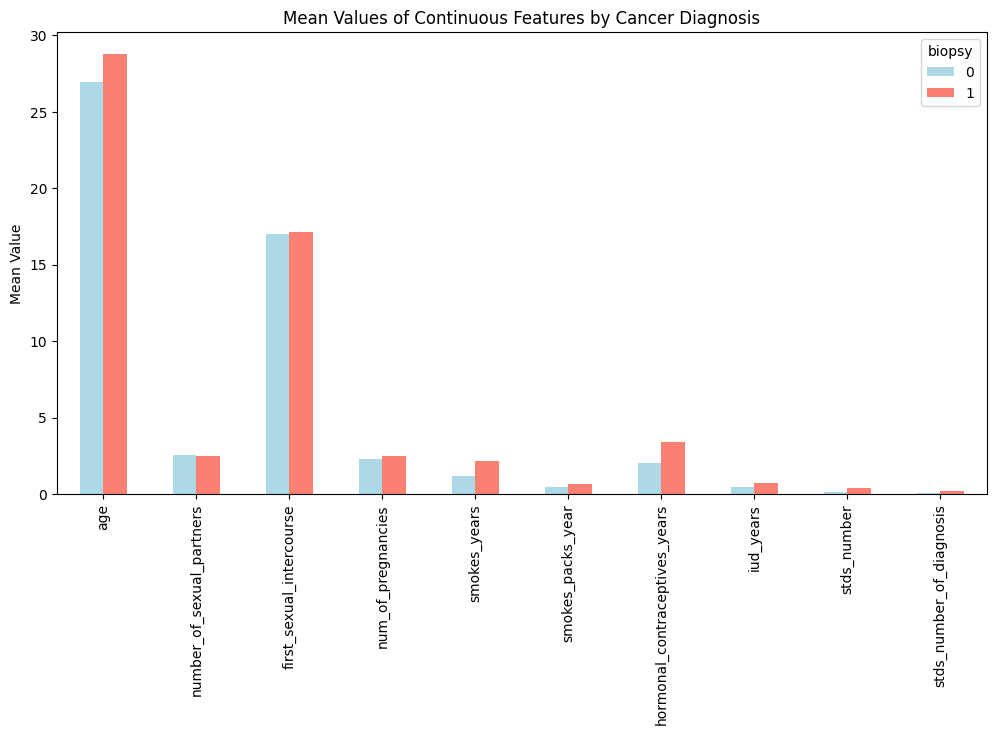

In [ ]:
# Compare mean of continuous variables grouped by target
group_means = df.groupby('biopsy')[cont_cols].mean().T
group_means.plot(kind='bar', figsize=(12, 6), color=['lightblue', 'salmon'])
plt.title("Mean Values of Continuous Features by Cancer Diagnosis")
plt.ylabel("Mean Value")
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Split features and target
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

TARGET = "biopsy"

X = df.drop(columns=[TARGET]).copy()
y = df[TARGET].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
# Encode y if not numeric 0/1
from sklearn.preprocessing import LabelEncoder

def needs_encoding(s: pd.Series) -> bool:
    return (not np.issubdtype(s.dtype, np.number)) or bool(set(pd.unique(s.dropna())) - {0, 1})

if needs_encoding(y_train):
    le = LabelEncoder()
    y_train = le.fit_transform(y_train.astype(str))
    y_test  = le.transform(y_test.astype(str))
else:
    y_train = y_train.astype(int)
    y_test  = y_test.astype(int)


In [ ]:
# Identify binary vs continuous and scale continuous
from sklearn.preprocessing import StandardScaler

def is_binary_series(s: pd.Series) -> bool:
    vals = set(pd.unique(s.dropna()))
    return vals.issubset({0, 1})

binary_X = [c for c in X_train.columns if is_binary_series(X_train[c])]
cont_X   = [c for c in X_train.columns if c not in binary_X]

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled  = X_test.copy()

if cont_X:
    X_train_scaled[cont_X] = scaler.fit_transform(X_train[cont_X])
    X_test_scaled[cont_X]  = scaler.transform(X_test[cont_X])


In [ ]:
# Apply SMOTE with binary (categorical) indices
from imblearn.over_sampling import SMOTENC

cat_idx = [X_train_scaled.columns.get_loc(c) for c in binary_X]
smote = SMOTENC(categorical_features=cat_idx, random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

print("Class counts before SMOTE:", dict(pd.Series(y_train).value_counts()))
print("Class counts after SMOTE:", dict(pd.Series(y_train_res).value_counts()))
print("Train (resampled):", X_train_res.shape, y_train_res.shape)
print("Test:", X_test_scaled.shape, y_test.shape)


Class counts before SMOTE: {0: np.int64(621), 1: np.int64(43)}
Class counts after SMOTE: {0: np.int64(621), 1: np.int64(621)}
Train (resampled): (1242, 33) (1242,)
Test: (166, 33) (166,)
